In [3]:
import m11_load_data, m12_transform_data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Import Data**

In [5]:
df_users, df_movies, df_ratings = m12_transform_data.transform_data()

**Explore Customers data**

In [ ]:
df_users.head()

In [ ]:
df_users.info()

In [ ]:
print(
    'Num. of unique customers :' , df_users['userId'].nunique()
    , '\nUserId range             :', df_users['userId'].min(), '-', df_users['userId'].max()
)

# distribution of gender variable
gender_distr = df_users.groupby(by = ['gender']).size().reset_index().rename(columns={0:'size'})
gender_distr['share'] = (gender_distr['size']/gender_distr['size'].sum() ).round(2)
print('\nGender Distribution\n', gender_distr.set_index('gender').sort_values(by=['share'], ascending=[False]) )

# distribution of age variable
age_distr = df_users.groupby(by = ['age']).size().reset_index().rename(columns={0:'size'})
age_distr['share'] = (age_distr['size']/age_distr['size'].sum() ).round(2)
print('\nAge Distribution\n',
      age_distr[['age', 'size', 'share']]\
      .set_index('age').sort_values(by=['size'], ascending=[False])
     )

In [ ]:
age_distr = age_distr[['age', 'size', 'share']].set_index('age').sort_values(by=['age'], ascending=[True]).reset_index()
age_distr['age_bin'] = np.where( age_distr['age'] <= 18, 0,
                               np.where(age_distr['age'] <= 29, 1,
                                        np.where(age_distr['age'] <= 39, 2,
                                                 np.where(age_distr['age'] <= 49, 3,
                                                          np.where(age_distr['age'] <= 59, 4, 5)
                                                         )
                                                )
                                       )
                               )
#sns.barplot(age_distr[['age', 'size', 'share']].set_index('age').sort_values(by=['age'], ascending=[True]).reset_index()
#            , x="age", y="share")
age_distr.groupby(by=['age_bin'])[['size', 'share']].sum()

In [ ]:
# distribution of job variable
job_distr = df_users.groupby(by = ['job']).size().reset_index().rename(columns={0:'size'})
job_distr['share'] = (job_distr['size']/job_distr['size'].sum() ).round(2)
print('\nJob Distribution\n',
      job_distr[['job', 'size', 'share']]\
      .set_index('job').sort_values(by=['size'], ascending=[False])
     )

In [ ]:
# distribution of zip code variable
print( 'Num. of unique zip codes' , df_users['zip_code'].nunique() )

zip_distr = df_users.groupby(by = ['zip_code']).size().reset_index().rename(columns={0:'size'})
zip_distr['share'] = (zip_distr['size']/zip_distr['size'].sum() ).round(2)
print('\nZip Code Distribution\n',
      zip_distr.set_index('zip_code').sort_values(by=['size'], ascending=[False])
      )

**Explore Movies' data**

In [ ]:
df_movies.head()

In [ ]:
df_movies.info()

In [ ]:
(df_movies.iloc[:,4:].sum()/df_movies.shape[0]*100).reset_index().sort_values(by=0,ascending=False)

In [ ]:
print(
    'Num. of unique movies :' , df_movies['itemId'].nunique()
    , '\nMovieId range         :', df_movies['itemId'].min(), '-', df_movies['itemId'].max()
)

**Explore Ratings' data**

In [6]:
df_ratings.head()

,userId,itemId,rating,timestamp,date,time
0,195,241,3,881250949,19971204,155549
1,185,301,3,891717742,19980404,192222
2,21,376,1,878887116,19971107,071836
3,243,50,2,880606923,19971127,050203
4,165,345,1,886397596,19980202,053316


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   userId     100000 non-null  int64 
 1   itemId     100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   date       100000 non-null  string
 5   time       100000 non-null  string
dtypes: int64(4), string(2)
memory usage: 4.6 MB


In [ ]:
"""
Does it appear multiple ratings in a movie by the same user?
    >> NO, it is only registered a single rating per movie for all the users
    
How many movies were rated by each user? (distribution incl. average, median, ...)
How many users rated each of the movies? (distribution incl. average, median, ...)

"""

count    1682.0
mean       59.0
std        80.0
min         1.0
25%         6.0
50%        27.0
75%        80.0
max       583.0
Name: vol_ratings, dtype: float64
count    943.0
mean     106.0
std      101.0
min       20.0
25%       33.0
50%       65.0
75%      148.0
max      737.0
Name: vol_ratings, dtype: float64


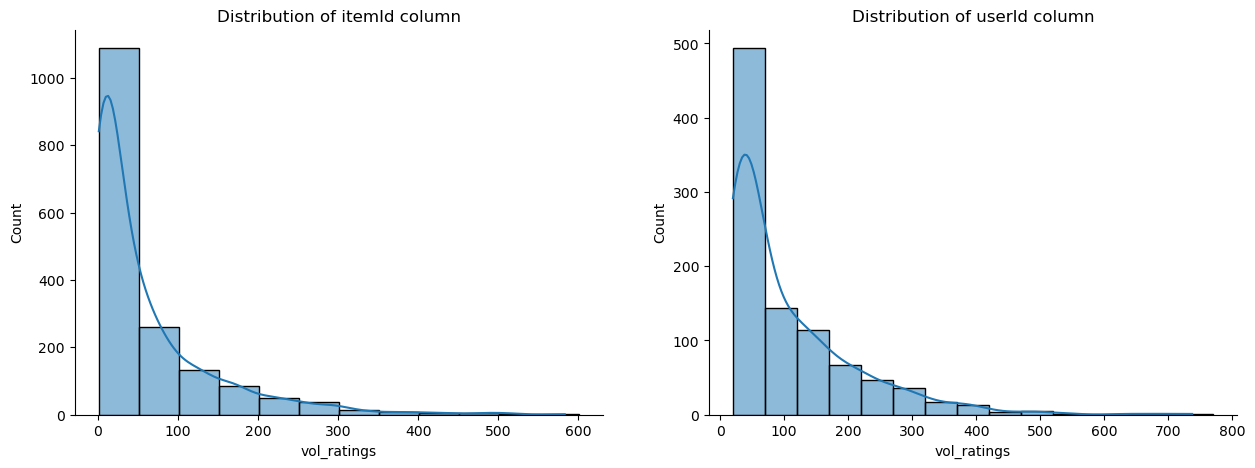

In [12]:
# Checking whether or not there are records of multiples ratings for the same iteam for each of the users
df_ratings[df_ratings[['userId', 'itemId']].duplicated()].shape[0]

fig, ax =plt.subplots(1,2, figsize=(15,5))
for col,i in zip(['itemId', 'userId'], [0,1]):

    ax[i].set_title(f"Distribution of {col} column")
    sns.histplot(
        data=df_ratings.groupby(by=[col]).size().reset_index().rename(columns={0:'vol_ratings'})['vol_ratings']
        , binwidth = 50, stat = 'count', kde = True, ax = ax[i]
    )
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    
    print( df_ratings.groupby(by=[col]).size().reset_index().rename(columns={0:'vol_ratings'})['vol_ratings'].describe().round() )

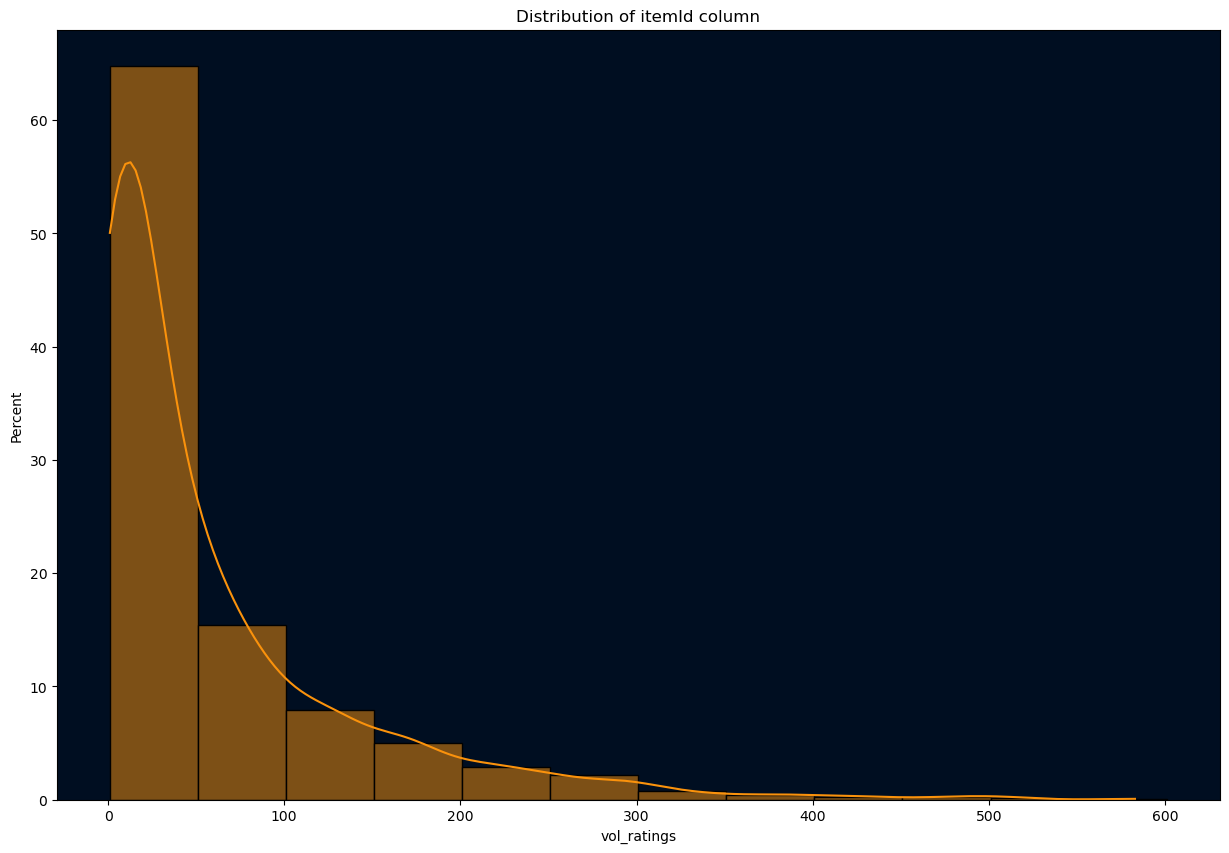

In [13]:
fig, ax =plt.subplots(1,1, figsize=(15,10))
for col,i in zip(['itemId'], [0]):

    ax.set_title(f"Distribution of {col} column")
    sns.histplot(
        data=df_ratings.groupby(by=[col]).size().reset_index().rename(columns={0:'vol_ratings'})['vol_ratings']
        , binwidth = 50, stat = 'percent', kde = True, ax = ax, color= "#FA920C"
    )
    ax.set_facecolor("#000E21")
    #plt.tick_params(top=False, bottom=False, left=False, right=False,
    #            labelleft=False, labelbottom=False)


In [ ]:
df_ratings['date'].min(), df_ratings['date'].max()

In [ ]:
df_ratings[df_ratings['date']>='19980222']

In [16]:
# bias towards high ratings
aux = df_ratings.groupby('rating').size().reset_index().rename(columns={0:'size'})
aux['share'] = (aux['size']/aux['size'].sum() *100).round(1)
aux

,rating,size,share
0,1,6110,6.1
1,2,11370,11.4
2,3,27145,27.1
3,4,34174,34.2
4,5,21201,21.2


,date,vol_ratings,date_d,yearweek
0,19970920,915,1997-09-20,199738
1,19970921,825,1997-09-21,199738
2,19970922,666,1997-09-22,199739
3,19970923,386,1997-09-23,199739
4,19970924,566,1997-09-24,199739


,yearweek,vol_ratings
0,199738,1740
1,199739,4129
2,199740,3540
3,199741,2390
4,199742,2039


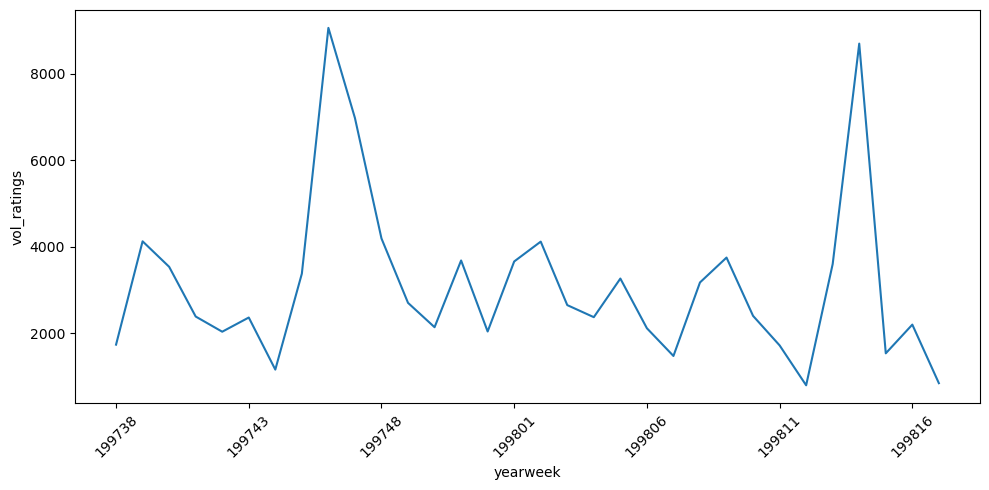

In [11]:
aux = df_ratings.groupby('date').size().reset_index().rename(columns={0:'vol_ratings'})

# add date columns
aux['date_d'] = pd.to_datetime(aux['date'], format='%Y%m%d')
aux['yearweek'] = aux['date_d'].dt.strftime('%Y') + aux['date_d'].dt.isocalendar().week.astype(str).str.zfill(2)
aux['yearweek'] = np.where(aux['yearweek'] == '199701', '199801', aux['yearweek'])

display(aux.head())
display(aux.groupby('yearweek')['vol_ratings'].sum().reset_index().head())

aux_2 = aux.groupby('yearweek')['vol_ratings'].sum().reset_index()

# Showing every 5th label
tick_positions = aux_2['yearweek'][::5]  # Select every 5th week
tick_labels = aux_2['yearweek'][::5]
plt.figure(figsize=(10, 5))
sns.lineplot(data=aux_2, x="yearweek", y="vol_ratings")
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
aux.sort_values('vol_ratings', ascending = False)

In [440]:
# most popular movies
display(
    df_movies[df_movies['itemId'].isin(
        df_ratings\
            .groupby('itemId').size().reset_index().rename(columns={0:'size'})\
            .sort_values(by='size', ascending = False).head(3)['itemId'].values
    )]
)

# hotest movies
aux = df_ratings\
    .groupby('itemId').agg({'rating' : ['mean', 'size']}).sort_values([('rating', 'mean')], ascending=False)
display(
    df_movies[df_movies['itemId'].isin(
        aux[aux['rating']['size'] >= aux['rating']['size'].mean()].head(3).index
    )]
)

,itemId,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
49,49,Star Wars (1977),01-Jan-1977,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
99,99,Fargo (1996),14-Feb-1997,http://us.imdb.com/M/title-exact?Fargo%20(1996),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
257,257,Contact (1997),11-Jul-1997,http://us.imdb.com/Title?Contact+(1997/I),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


,itemId,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
168,168,"Wrong Trousers, The (1993)",01-Jan-1993,http://us.imdb.com/M/title-exact?Wrong%20Trous...,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
317,317,Schindler's List (1993),01-Jan-1993,http://us.imdb.com/M/title-exact?Schindler's%2...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
407,407,"Close Shave, A (1995)",28-Apr-1996,http://us.imdb.com/M/title-exact?Close%20Shave...,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [454]:
df_ratings[df_ratings['itemId'].isin([168, 317, 407])]\
    .groupby('itemId').agg({'rating' : ['mean', 'size']}).sort_values([('rating', 'mean')], ascending=False)

rating     
            mean size
itemId               
407     4.491071  112
317     4.466443  298
168     4.466102  118

In [45]:
aux = df_ratings.copy()
aux['hour'] = df_ratings['time'].str.slice(start=0, stop=2)
aux = aux.groupby('hour').size().reset_index().rename(columns={0:'size'} )
aux['share'] = (aux['size']/aux['size'].sum()*100).round(2)
aux.sort_values('size')

,hour,size,share
11,11,637,0.64
12,12,956,0.96
8,08,1133,1.13
10,10,1185,1.18
7,07,1540,1.54
13,13,1662,1.66
9,09,1951,1.95
15,15,3107,3.11
14,14,3149,3.15
6,06,3500,3.50


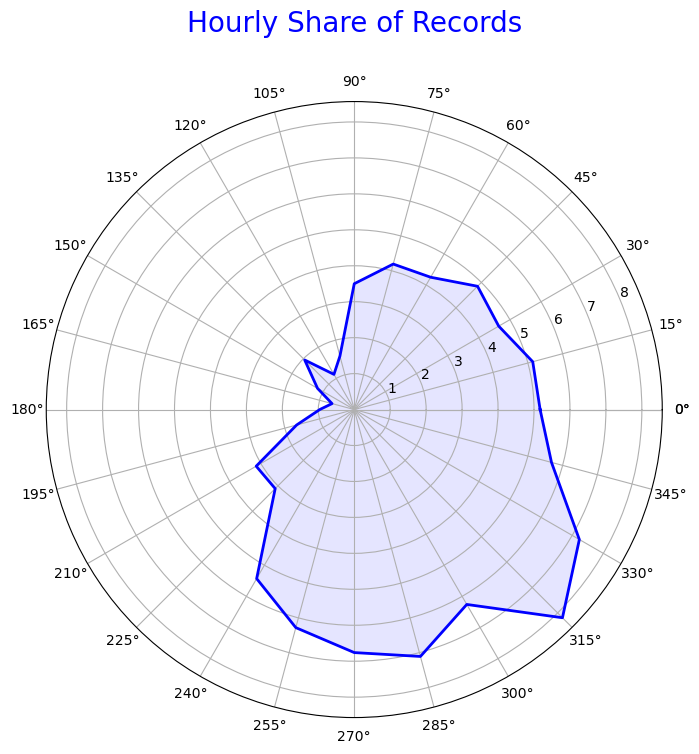

In [85]:
# Convert hour '24' to '00' for correct ordering and plotting
aux['hour'] = aux['hour'].replace('24', '00')

# Sort DataFrame by 'hour' to ensure correct plotting order
aux = aux.sort_values(by='hour')

# Convert 'hour' back to '24' at display time in labels if needed
aux['hour_label'] = aux['hour'].replace('00', '24')
#display(aux)
# Create the radar chart
labels = aux['hour']
stats = aux['share']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Complete the loop
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, stats, 'b', alpha=0.1)
ax.plot(angles, stats, 'b', linewidth=2)  # Line plot
ax.set_xticks(angles)
#ax.set_xticklabels(labels)

# Display settings
ax.set_title('Hourly Share of Records', size=20, color='b', y=1.1)

plt.show()

In [10]:
aux = df_ratings.merge(
    df_movies[['itemId']+list(df_movies.columns[4:])]
    , on = 'itemId', how='left'
)
genre_dict = []
for col_genre in list(df_movies.columns[4:]):
    genre_dict_i = {}
    aux_i = aux[aux[col_genre]==1]
    genre_dict_i['genre'] = col_genre
    genre_dict_i['vol_ratings'] = aux_i.shape[0]
    genre_dict_i['avg_rating'] = aux_i['rating'].mean().round(2)

    for r in [1,2,3,4,5]:
        genre_dict_i['vol_rat'+str(r)] = aux_i[aux_i['rating']==r].shape[0]
        genre_dict_i['share_rat'+str(r)] = np.round(aux_i[aux_i['rating']==r].shape[0]/aux_i.shape[0]*100)
    genre_dict.append(genre_dict_i)

aux = pd.DataFrame(genre_dict)
aux['share_ratings'] = (aux['vol_ratings']/df_ratings.shape[0]*100).round()
aux.sort_values(by='vol_ratings', ascending=False)

,genre,vol_ratings,avg_rating,vol_rat1,share_rat1,vol_rat2,share_rat2,vol_rat3,share_rat3,vol_rat4,share_rat4,vol_rat5,share_rat5,share_ratings
8,Drama,39895,3.69,1766,4.0,3647,9.0,9877,25.0,14608,37.0,9997,25.0,40.0
5,Comedy,29832,3.39,2279,8.0,3856,13.0,8751,29.0,9722,33.0,5224,18.0,30.0
1,Action,25589,3.48,1547,6.0,3254,13.0,7254,28.0,8431,33.0,5103,20.0,26.0
16,Thriller,21872,3.51,1245,6.0,2614,12.0,6088,28.0,7613,35.0,4312,20.0,22.0
14,Romance,19461,3.62,942,5.0,2017,10.0,5061,26.0,6882,35.0,4559,23.0,19.0
2,Adventure,13753,3.50,804,6.0,1709,12.0,3901,28.0,4436,32.0,2903,21.0,14.0
15,Sci-Fi,12730,3.56,724,6.0,1519,12.0,3296,26.0,4277,34.0,2914,23.0,13.0
17,War,9398,3.82,367,4.0,762,8.0,2020,21.0,3335,35.0,2914,31.0,9.0
6,Crime,8055,3.63,417,5.0,834,10.0,2006,25.0,2835,35.0,1963,24.0,8.0
4,Children,7182,3.35,574,8.0,961,13.0,2218,31.0,2212,31.0,1217,17.0,7.0


,genre,yearweek,count,mean,vol_r1,vol_r2,vol_r3,vol_r4,vol_r5,share_r1,share_r2,share_r3,share_r4,share_r5,count_cumsum,count_cumper
0,Drama,199738,609,3.84,10.0,42.0,147.0,244.0,166.0,2.0,7.0,24.0,40.0,27.0,609,2.0
1,Drama,199739,1528,3.66,68.0,155.0,378.0,552.0,375.0,4.0,10.0,25.0,36.0,25.0,2137,5.0
2,Drama,199740,1221,3.71,43.0,111.0,302.0,468.0,297.0,4.0,9.0,25.0,38.0,24.0,3358,8.0
3,Drama,199741,923,3.75,32.0,69.0,216.0,384.0,222.0,3.0,7.0,23.0,42.0,24.0,4281,11.0
4,Drama,199742,848,3.74,32.0,73.0,222.0,280.0,241.0,4.0,9.0,26.0,33.0,28.0,5129,13.0
5,Drama,199743,917,3.81,28.0,78.0,186.0,377.0,248.0,3.0,9.0,20.0,41.0,27.0,6046,15.0
6,Drama,199744,443,3.77,13.0,36.0,102.0,183.0,109.0,3.0,8.0,23.0,41.0,25.0,6489,16.0
7,Drama,199745,1239,3.40,171.0,115.0,268.0,420.0,265.0,14.0,9.0,22.0,34.0,21.0,7728,19.0
8,Drama,199746,3812,3.74,106.0,381.0,889.0,1462.0,974.0,3.0,10.0,23.0,38.0,26.0,11540,29.0
9,Drama,199747,2848,3.80,75.0,229.0,700.0,1042.0,802.0,3.0,8.0,25.0,37.0,28.0,14388,36.0


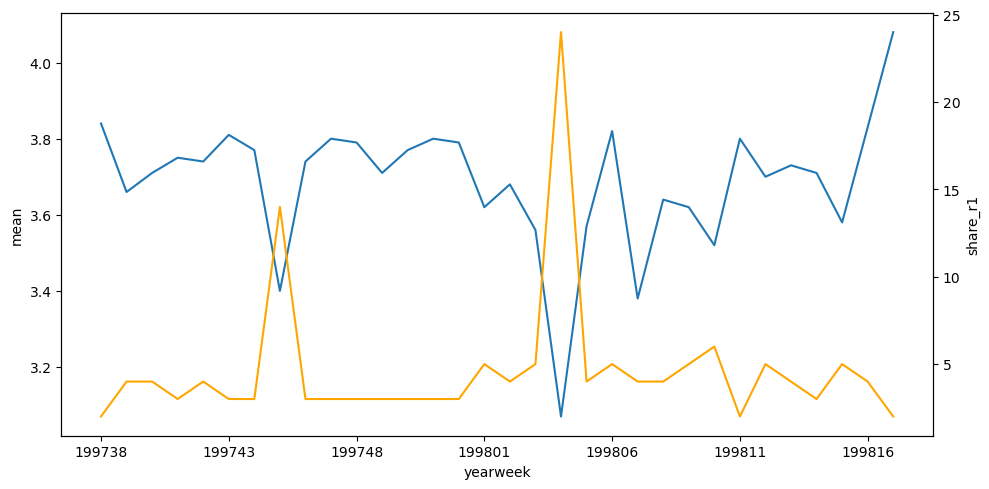

In [20]:
aux = df_ratings.copy()

# add date columns
aux['date_d'] = pd.to_datetime(aux['date'], format='%Y%m%d')
aux['yearweek'] = aux['date_d'].dt.strftime('%Y') + aux['date_d'].dt.isocalendar().week.astype(str).str.zfill(2)
aux['yearweek'] = np.where(aux['yearweek'] == '199701', '199801', aux['yearweek'])

aux = aux.merge(
    df_movies[['itemId']+list(df_movies.columns[4:])]
    , on = 'itemId', how='left'
)

df_aux = []
for col_genre in list(df_movies.columns[4:]):
    
    genre_dict_i = {}
    aux_i = aux[aux[col_genre]==1]
    
    aux_is = aux_i.groupby('yearweek').agg({'rating': ['count', 'mean']}).round(2).droplevel(0, axis=1).reset_index()\
                .merge(
                    aux_i.groupby(['yearweek', 'rating']).size().reset_index().rename(columns={0:'size'})\
                        .pivot(index='yearweek', columns='rating', values='size').fillna(0).reset_index()
                    , on='yearweek', how = 'left'
                    ).rename(columns = {1:'vol_r1', 2:'vol_r2', 3:'vol_r3', 4:'vol_r4', 5:'vol_r5'})
    aux_is['genre'] = col_genre
    aux_is = aux_is[ [aux_is.columns[-1]] + list(aux_is.columns[:-1])]
    df_aux.append(aux_is)

df_aux = pd.concat(df_aux)[['genre', 'yearweek', 'count', 'mean', 'vol_r1', 'vol_r2', 'vol_r3', 'vol_r4', 'vol_r5']].fillna(0)
for col_r in ['vol_r1', 'vol_r2', 'vol_r3', 'vol_r4', 'vol_r5']:
    df_aux['share_'+col_r[-2:]] = (df_aux[col_r]/df_aux['count']*100).round()

# filter by most popular genres
genres_list = ['Drama']
# ['Sci-Fi', 'Adventure', 'Romance', 'Thriller', 'Action', 'Comedy', 'Drama']
df_aux = df_aux[df_aux['genre'].isin(genres_list)]

# cum sum
df_aux['count_cumsum'] = df_aux.groupby('genre')['count'].cumsum()
df_aux = df_aux.merge(
    df_aux.groupby('genre')['count'].sum().reset_index().rename(columns={'count':'total_vol_rat'})
    , how = 'left', on='genre')
df_aux['count_cumper'] = (df_aux['count_cumsum']/df_aux['total_vol_rat']*100).round()
df_aux.drop(columns=['total_vol_rat'], inplace=True)

display(df_aux)

# Showing every 5th label
tick_positions = df_aux['yearweek'].unique()[::5]  # Select every 5th week
tick_labels = df_aux['yearweek'].unique()[::5]
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_aux, x="yearweek", y="mean")
ax2 = plt.twinx()
sns.lineplot(data=df_aux, x="yearweek", y="share_r1", ax = ax2, color='orange')
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
plt.tight_layout()
plt.show()

In [22]:
df_aux.to_csv('test.csv')

In [354]:
# general overview
aux = df_ratings.groupby('userId').agg({'rating':['count', 'mean', 'std']}).round(2).droplevel(0, axis=1).reset_index()
# rating overview
aux2 = df_ratings.groupby(['userId', 'rating']).size().reset_index().rename(columns={0:'size'})\
        .pivot(index='userId', columns='rating', values='size').fillna(0).reset_index()\
        .rename(columns={1:'vol_r1', 2:'vol_r2', 3:'vol_r3', 4:'vol_r4', 5:'vol_r5'})

# overview + rating overview
aux = aux.merge(aux2, how='left', on='userId')
del aux2
for col_r in ['vol_r1', 'vol_r2', 'vol_r3', 'vol_r4', 'vol_r5']:
    aux['share'+col_r[-3:]] = (aux[col_r]/aux['count']*100).round()

# genre overview
list_df_genre =[
    df_ratings.merge( df_movies[['itemId']+list(df_movies.columns[4:])], on = 'itemId', how='left')
]
for col_genre in list(df_movies.columns[5:]):
    aux2_i = list_df_genre[0][list_df_genre[0][col_genre]==1]
    
    aux2_i1 = aux2_i.groupby('userId').agg({'rating':['count', 'mean', 'std']}).round(2).droplevel(0, axis=1).reset_index().fillna(0)
    aux2_i2 = aux2_i.groupby(['userId', 'rating']).size().reset_index().rename(columns={0:'size'})\
        .pivot(index='userId', columns='rating', values='size').fillna(0).reset_index()\
        .rename(columns={1:'vol_r1', 2:'vol_r2', 3:'vol_r3', 4:'vol_r4', 5:'vol_r5'})
    aux2_i1 = aux2_i1.merge(aux2_i2, how='outer', on='userId')
    del aux2_i2, aux2_i
    for col_r in ['vol_r1', 'vol_r2', 'vol_r3', 'vol_r4', 'vol_r5']:
        aux2_i1['share'+col_r[-3:]] = (aux2_i1[col_r]/aux2_i1['count']*100).round()

    aux2_i1.columns = col_genre+'_'+aux2_i1.columns
    aux2_i1.rename(columns={col_genre+'_'+'userId' :'userId'}, inplace=True)
    list_df_genre.append(aux2_i1)

    #display(aux2_i1)

df_final = list_df_genre[1]
for df in list_df_genre[2:]:
    df_final = df_final.merge(df, how='outer', on = 'userId')

aux = aux.merge(df_final.fillna(0), how='left', on='userId')

In [400]:
aux[aux['share_r5']>=30]

,userId,count,mean,std,vol_r1,vol_r2,vol_r3,vol_r4,vol_r5,share_r1,...,Western_vol_r1,Western_vol_r2,Western_vol_r3,Western_vol_r4,Western_vol_r5,Western_share_r1,Western_share_r2,Western_share_r3,Western_share_r4,Western_share_r5
0,0,272,3.61,1.26,25.0,28.0,56.0,82.0,81.0,9.0,...,0.0,0.0,3.0,2.0,1.0,0.0,0.0,50.0,33.0,17.0
3,3,24,4.33,0.92,0.0,1.0,4.0,5.0,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,403,3.97,1.06,14.0,18.0,97.0,113.0,161.0,3.0,...,0.0,2.0,6.0,1.0,9.0,0.0,11.0,33.0,6.0,50.0
7,7,59,3.80,1.24,5.0,4.0,10.0,19.0,21.0,8.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,67.0,33.0
8,8,22,4.27,0.94,1.0,0.0,1.0,10.0,10.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,927,32,4.69,0.69,0.0,0.0,4.0,2.0,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,931,241,3.97,0.98,2.0,26.0,29.0,105.0,79.0,1.0,...,0.0,1.0,1.0,7.0,2.0,0.0,9.0,9.0,64.0,18.0
938,938,49,4.27,0.97,0.0,4.0,6.0,12.0,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,940,22,4.05,0.90,0.0,2.0,2.0,11.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [432]:
df_user_rating = (aux['share_r4']+aux['share_r5']
                 ).reset_index().rename(columns={0:'share'})
df_user_rating[df_user_rating['share']>=50]

,index,share
0,0,60.0
1,1,65.0
3,3,79.0
5,5,63.0
6,6,68.0
...,...,...
938,938,79.0
939,939,53.0
940,940,82.0
941,941,83.0


In [434]:
df_ratings['rating'].mean()

3.52986